In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

In [2]:
# load data
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\COSING_Annex_II_v2.txt", skiprows=4)

df.head()

,Reference Number,Chemical name / INN,CAS Number,EC Number,Regulation,Other Directives/Regulations,SCCS opinions,Chemical/IUPAC Name,Identified INGREDIENTS or substances e.g.,CMR,Update Date
0,1,N-(5-Chlorobenzoxazol-2-yl)acetamide,35783-57-4,-,(EC) 2009/1223,NaN,NaN,NaN,NaN,NaN,17/10/2010
1,2,(2-Acetoxyethyl)trimethylammonium hydroxide (A...,51-84-3,200-128-9,(EC) 2009/1223,NaN,NaN,NaN,",,,,",NaN,17/10/2010
2,3,Deanol aceglumate (INN),3342-61-8,222-085-5,(EC) 2009/1223,NaN,NaN,NaN,NaN,NaN,15/10/2010
3,4,Spironolactone (INN),52-01-7,200-133-6,(EC) 2009/1223,NaN,NaN,NaN,SPIRONOLACTONE,NaN,15/10/2010
4,5,"[4-(4-Hydroxy-3-iodophenoxy)-3,5-diiodophenyl]...",51-24-1,200-086-1,(EC) 2009/1223,NaN,NaN,Triiodothyroacetic acid; (4-(4-Hydroxy-3-iodop...,NaN,NaN,17/10/2010


In [3]:
# save as csv file
df.to_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\cosing_data.csv", index=False)

In [4]:
# read the csv file
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\cosing_data.csv")
df.head()

,Reference Number,Chemical name / INN,CAS Number,EC Number,Regulation,Other Directives/Regulations,SCCS opinions,Chemical/IUPAC Name,Identified INGREDIENTS or substances e.g.,CMR,Update Date
0,1,N-(5-Chlorobenzoxazol-2-yl)acetamide,35783-57-4,-,(EC) 2009/1223,NaN,NaN,NaN,NaN,NaN,17/10/2010
1,2,(2-Acetoxyethyl)trimethylammonium hydroxide (A...,51-84-3,200-128-9,(EC) 2009/1223,NaN,NaN,NaN,",,,,",NaN,17/10/2010
2,3,Deanol aceglumate (INN),3342-61-8,222-085-5,(EC) 2009/1223,NaN,NaN,NaN,NaN,NaN,15/10/2010
3,4,Spironolactone (INN),52-01-7,200-133-6,(EC) 2009/1223,NaN,NaN,NaN,SPIRONOLACTONE,NaN,15/10/2010
4,5,"[4-(4-Hydroxy-3-iodophenoxy)-3,5-diiodophenyl]...",51-24-1,200-086-1,(EC) 2009/1223,NaN,NaN,Triiodothyroacetic acid; (4-(4-Hydroxy-3-iodop...,NaN,NaN,17/10/2010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Reference Number                           1722 non-null   int64 
 1   Chemical name / INN                        1722 non-null   object
 2   CAS Number                                 1722 non-null   object
 3   EC Number                                  1722 non-null   object
 4   Regulation                                 1722 non-null   object
 5   Other Directives/Regulations               47 non-null     object
 6   SCCS opinions                              946 non-null    object
 7   Chemical/IUPAC Name                        612 non-null    object
 8   Identified INGREDIENTS or substances e.g.  383 non-null    object
 9   CMR                                        1026 non-null   object
 10  Update Date                         

In [ ]:
# check for empty cells
df.isna().sum()

Reference Number                                0
Chemical name / INN                             0
CAS Number                                      0
EC Number                                       0
Regulation                                      0
Other Directives/Regulations                 1675
SCCS opinions                                 776
Chemical/IUPAC Name                          1110
Identified INGREDIENTS or substances e.g.    1339
CMR                                           696
Update Date                                     0
dtype: int64

There are a lot of empty cells in columns like other directives/regulations, chemical/IUPAC name, identified ingredients or substance, cmr, sccs opinions

In [9]:
# drop some of the columns as they are not really necessary for the project

columns_to_drop = [
    'Reference Number', # not needed for identifying
    'Update Date',
    'Regulation', # this might be helpful to know what regulation is the chemical in but not really necessary when matching
    'Other Directives/Regulations',
    'CAS Number', # other dataset might not have this
    'EC Number',
]

# bye bye columns
df = df.drop(columns=columns_to_drop)
print("Remaining Columns:", df.columns.tolist())

Remaining Columns: ['Chemical name / INN', 'SCCS opinions', 'Chemical/IUPAC Name', 'Identified INGREDIENTS or substances e.g.', 'CMR']


SCCS Opinions can be kept for future reference

In [10]:
# rename the columns (optional?)
df.columns = [
    'chemical name inn',
    'sccs opinions',
    'chemical iupac name',
    'identified ingredient substance',
    'cmr'
]

print("Renamed Columns:", df.columns.tolist())

Renamed Columns: ['chemical name inn', 'sccs opinions', 'chemical iupac name', 'identified ingredient substance', 'cmr']


In [11]:
# check columns one by one
# chemical name inn
df['chemical name inn'].value_counts()

chemical name inn
Moved or deleted                                                                                                                                                                                                                                                                                                                                          18
Procainamide (INN), its salts and derivatives                                                                                                                                                                                                                                                                                                              1
Reaction mass of 3-(difluoromethyl)-1-methyl-N-[(1RS,4SR,9RS)-1,2,3,4-tetrahydro-9-isopropyl-1,4-methanonaphthalen-5-yl]pyrazole-4-carboxamide and 3-(difluoromethyl)-1-methyl-N-[(1RS,4SR,9SR)-1,2,3,4-tetrahydro-9-isopropyl-1,4-methanonaphthalen-5-yl]pyrazole-4-carboxamide [≥ 78 % syn

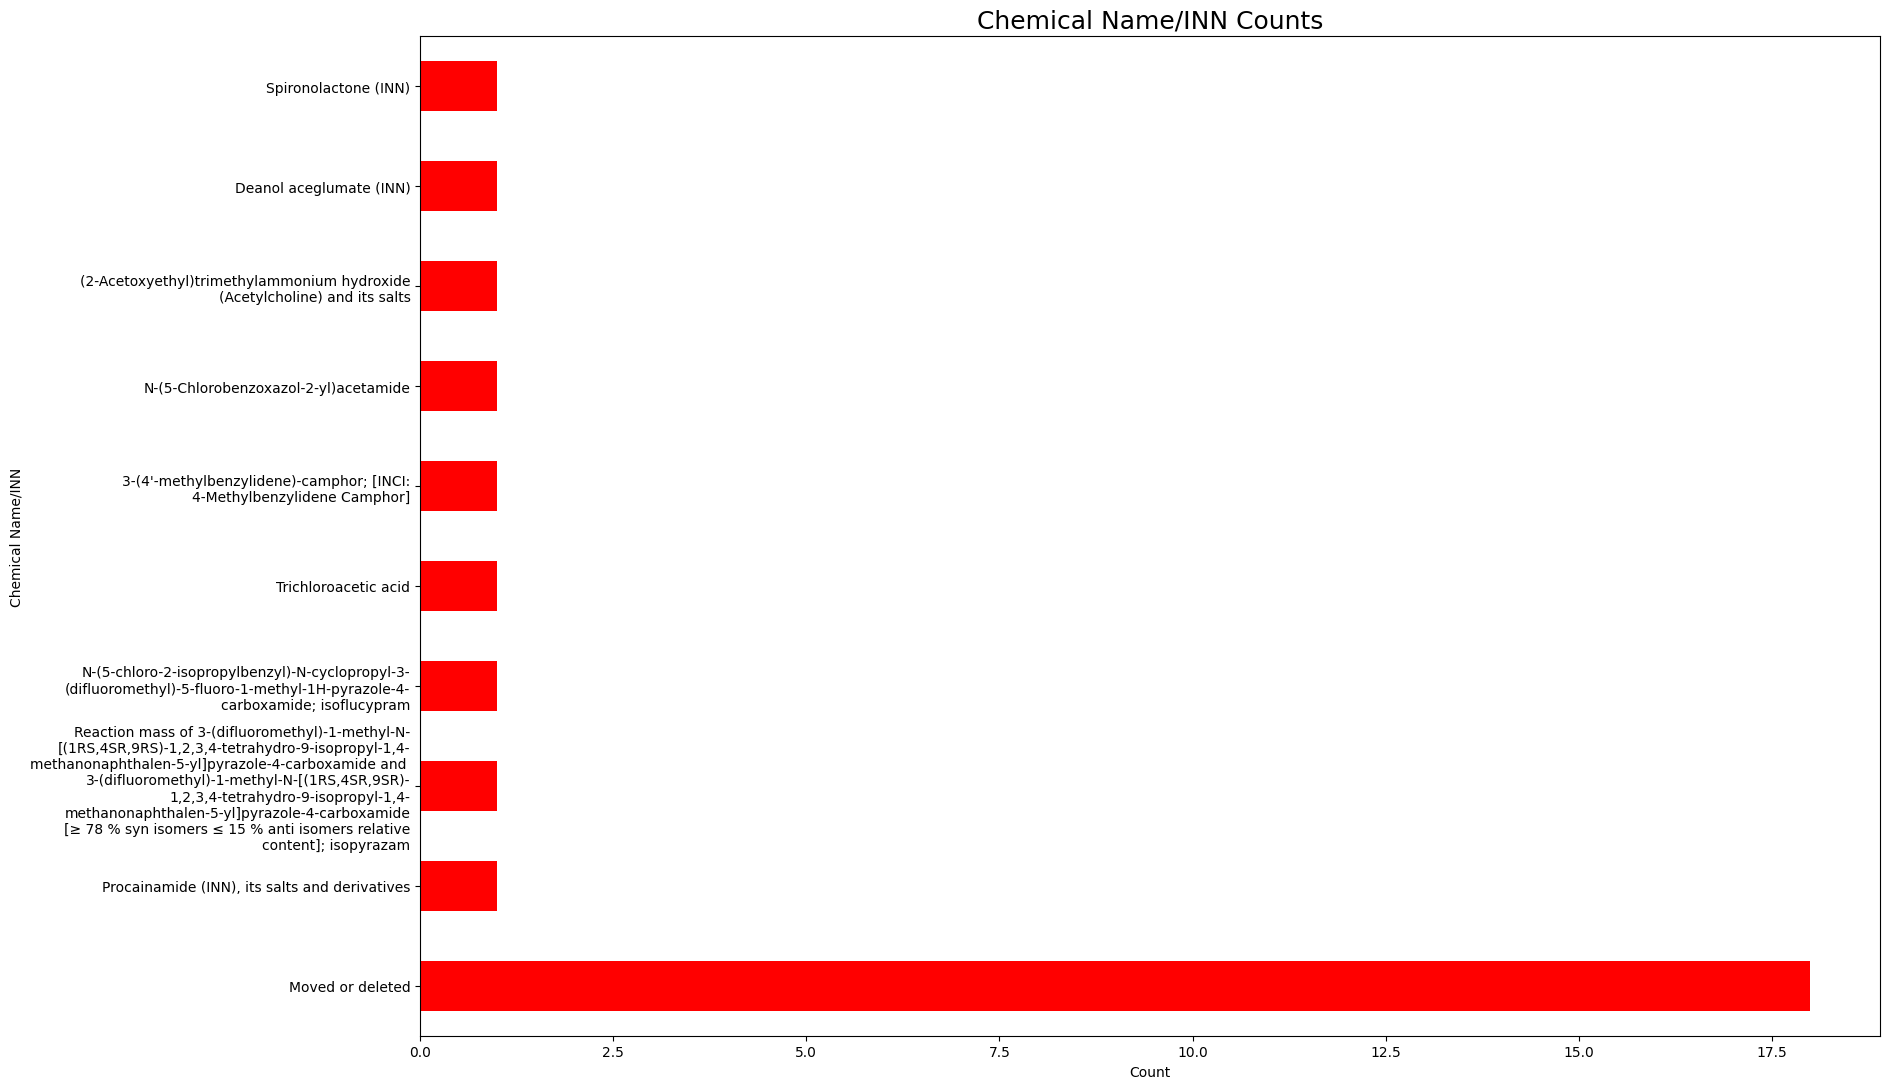

In [32]:
chemical_name_inn_counts = df['chemical name inn'].value_counts()[:10]

# name too long wrap them
wrapped_names = ['\n'.join(textwrap.wrap(name, width=50)) for name in chemical_name_inn_counts.index]

# set figure size
plt.figure(figsize=(19,11))

# bar chart
inn = chemical_name_inn_counts.plot(kind="barh", color="red")
plt.title("Chemical Name/INN Counts", size=18)
plt.xlabel("Count", size=10)
plt.ylabel("Chemical Name/INN", size=10)

# apply the wrapped
inn.set_yticklabels(wrapped_names)

plt.tight_layout()

There are 18 Moved or deleted chemical name here
Since moved or deleted is not a valid name cannot be used to check with other ingredients, say goodbye👋

In [39]:
df = df[~((df['chemical name inn'] == "Moved or deleted"))]

df['chemical name inn'].value_counts()

chemical name inn
N-(5-Chlorobenzoxazol-2-yl)acetamide                                                                                                                                   1
(2-Acetoxyethyl)trimethylammonium hydroxide (Acetylcholine) and its salts                                                                                              1
Deanol aceglumate (INN)                                                                                                                                                1
Spironolactone (INN)                                                                                                                                                   1
[4-(4-Hydroxy-3-iodophenoxy)-3,5-diiodophenyl]acetic acid (Tiratricol (INN)) and its salts                                                                             1
                                                                                                                                         

In [16]:
# SCCS Opinions (Scientific Committee on Consumer Safety's Opinions)
df['sccs opinions'].value_counts()

sccs opinions
Opinion concerning Chemical Ingredients in Cosmetic Products classified as Carcinogenic, Mutagenic or Toxic to Reproduction according to the Chemicals Directive 67/548/EECC,Opinion concerning Chemical Ingredients in Cosmetic Products classified as Carcinogenic, Mutagenic or Toxic to Reproduction according to the Chemicals Directive 67/548/EEC                                                                                                                             666
Opinion concerning Use of Permanent Hair Dyes and Bladder Cancer - Updated 2004,Opinion concerning Hair Dyes without File submitted,Opinion on Personal Use of Hair Dyes and Cancer Risk,Opinion on the Use of Permanent Hair Dyes and Bladder Cancer Risk,Assessment Strategies for Hair Dyes                                                                                                                                                                                        94
Opinion concerning Request for Confirmat

In [33]:
# chemical/IUPAC name: the name ហៅតាមខ្សែរកាបូន

df['chemical iupac name'].value_counts()

chemical iupac name
Triiodothyroacetic acid; (4-(4-Hydroxy-3-iodophenoxy)-3,5-diiodophenyl)acetic acid                                                                              1
4-(4-Hydroxy-3-iodophenoxy)-3,5-diiodobenzenepropanoic acid \r\n                                                                                                1
Aconitane-3,8,13,14,15-pentol, 20-ethyl-1,6,16-trimethoxy-4-(methoxymethyl)-, 8-acetate 14-benzoate, \r\n(1alpha,3alpha,6alpha,14alpha,15alpha,16beta)- \r\n    1
Adrenaline; Benzyl alcohol, 3,4-dihydroxy-alpha-((methylamino)methyl)-, (-)- \r\n\r\n                                                                           1
1,2-Benzenediol, 4-(1-hydroxy-2-((1-methylethyl)amino)ethyl)-                                                                                                   1
                                                                                                                                                               ..
Dimethom

In [34]:
# identidied ingredients and substance
df['identified ingredient substance'].value_counts()

identified ingredient substance
,                                                                                                                                                                                                                                                32
,,                                                                                                                                                                                                                                               15
,,,                                                                                                                                                                                                                                              11
,,,,,                                                                                                                                                                                                                                       

A lot of , ,, ,,, ,,,, ,,,,,

In [35]:
# make them normal again
df['identified ingredient substance'] = df['identified ingredient substance'].str.replace(r',+', '', regex=True).str.strip(',')

# now check again
df['identified ingredient substance'].value_counts()

identified ingredient substance
                                                                                                     70
TOLUENE-26-DIAMINE                                                                                    2
4-METHYLBENZYLIDENE CAMPHOR                                                                           1
SPIRONOLACTONE                                                                                        1
6-AMINOCAPROIC ACID                                                                                   1
                                                                                                     ..
PROGESTERONE                                                                                          1
ADIPIC ACID DIHYDRAZIDESTEARIC HYDRAZIDE                                                              1
ADIPIC ACID DIHYDRAZIDEAMINOGUANIDINE BICARBONATEAMINOGUANIDINE HClPOLYURETHANE-18POLYURETHANE-19     1
MEA-IODINEPVP-IODINEIODINE TRICH

now no annoying , ,, ,,,,

In [36]:
# cmr
# C: Carcinogenic (cause cancer)
# M: Mutagenic (alter DNA => មុយតាស្យុងសែន?)
# R: Reprotocix (damage reproductive systems)
df['cmr'].value_counts()

cmr
Carcinogenic Cat. 1B()                                                                       304
Carcinogenic Cat. 1B(),Mutagenic Cat. 1B()                                                   158
Carcinogenic Cat. 2()                                                                        142
Reprotoxic Cat. 2()                                                                           85
Reprotoxic Cat. 1B()                                                                          77
Carcinogenic Cat. 1A()                                                                        48
Mutagenic Cat. 2()                                                                            42
Carcinogenic Cat. 1B(),Reprotoxic Cat. 1B(),Mutagenic Cat. 2()                                26
Carcinogenic Cat. 1B(),Mutagenic Cat. 2()                                                     20
Carcinogenic Cat. 2(),Reprotoxic Cat. 2()                                                     18
Reprotoxic Cat. 1B(),Carci

Text(0.5, 0, 'Count')

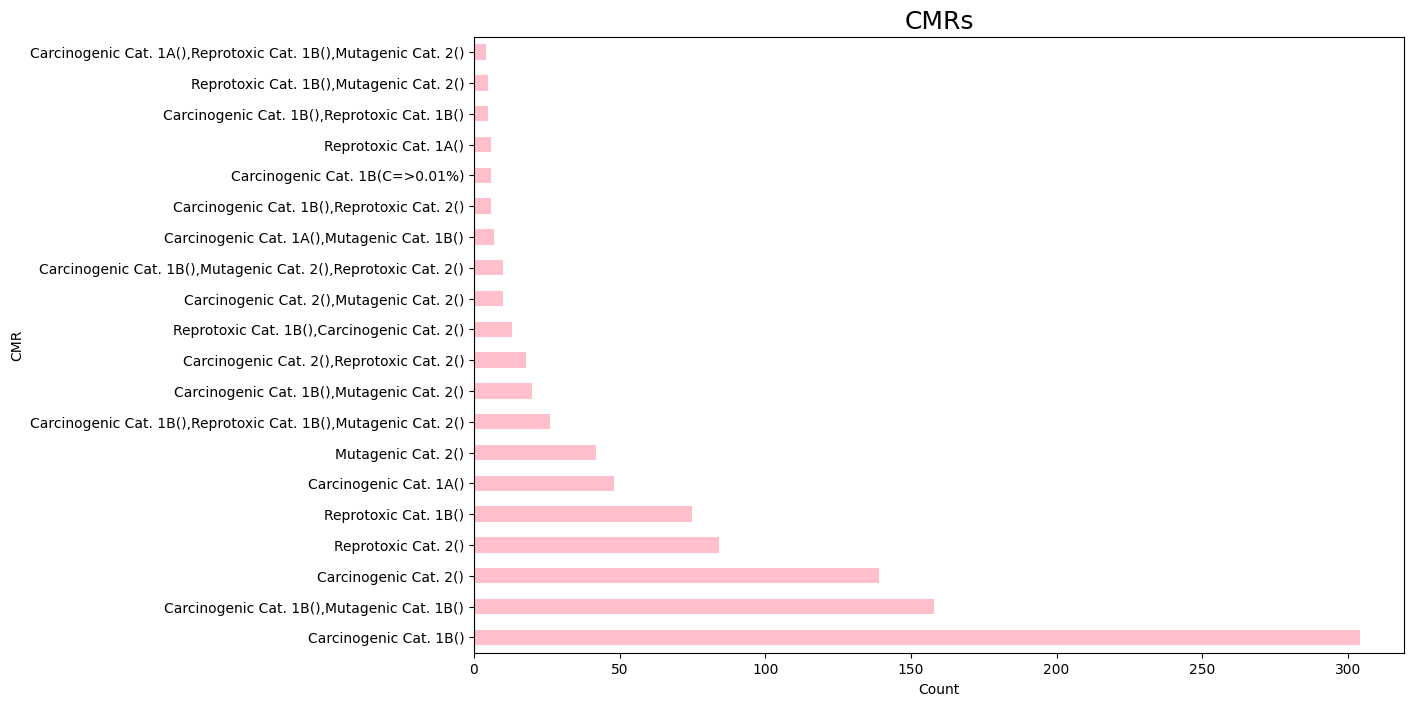

In [46]:
# visualize the CMR
cmr_counts = df['cmr'].value_counts()[:20]
plt.figure(figsize=(12,8))
cmr_counts.plot(kind='barh', color='pink')
plt.title("CMRs", size=18)
plt.ylabel("CMR", size=10)
plt.xlabel("Count", size=10)

over 300 Carcinogenic Category 1B meaning those are substances that presumed to have carcinogenic potential for humans based on animal evidence

In [53]:
# save
df.to_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\cosing_data_cleaned.csv")

df.head(10)

,chemical name inn,sccs opinions,chemical iupac name,identified ingredient substance,cmr
0,N-(5-Chlorobenzoxazol-2-yl)acetamide,NaN,NaN,NaN,NaN
1,(2-Acetoxyethyl)trimethylammonium hydroxide (A...,NaN,NaN,,NaN
2,Deanol aceglumate (INN),NaN,NaN,NaN,NaN
3,Spironolactone (INN),NaN,NaN,SPIRONOLACTONE,NaN
4,"[4-(4-Hydroxy-3-iodophenoxy)-3,5-diiodophenyl]...",NaN,Triiodothyroacetic acid; (4-(4-Hydroxy-3-iodop...,NaN,NaN
5,Methotrexate (INN),NaN,NaN,NaN,NaN
6,Aminocaproic acid (INN) and its salts,NaN,NaN,6-AMINOCAPROIC ACID,NaN
7,"Cinchophen (INN), its salts, derivatives and s...",NaN,NaN,,NaN
8,Thyropropic acid (INN) and its salts,NaN,"4-(4-Hydroxy-3-iodophenoxy)-3,5-diiodobenzenep...",NaN,NaN
9,Trichloroacetic acid,NaN,NaN,NaN,NaN
